
**Reading through Ch. 5 of Simon Wood's book and finding the general iterative approach for determining GAMs by backfitting.  The algorithm takes advantage of R's spline.smooth() function, which itself uses Penalized Residual Sum of Squares (PRSS) to compute penalized regression using cubic splines.**

#### This backfit worked initially
f<-x*0;alpha<-mean(y);ok <- TRUE while (ok) { # backfitting loop
for (i in 1:m) { # loop through the smooth terms ep <- y - rowSums(f[,-i]) - alpha
b <- smooth.spline(x[,i],ep,df=edf[i])
f[,i] <- predict(b,x[,i])$y
}
rss <- sum((y-rowSums(f))ˆ2)
if (abs(rss-rss0)<1e-6*rss) ok <- FALSE rss0 <- rss
}


In [323]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Adding R functionality.
from rpy2.robjects import r, pandas2ri, IntVector, Formula
pandas2ri.activate()

In [ ]:
#This backfitting algorithm worked, but it was causing kernel to crash when I tried to graph it.
#

%%R 
while (ok){ # backfitting loop
for (i in 1:m) {ep <- y-f[,-i]-alpha; 
b<-smooth.spline(x[,i],ep,df=10); 
f[,i] <- predict(b,x[,i])$y
}
rss<-sum((y-rowSums(f))^2);
if(abs(rss-rss0)<1e-6*rss) {ok <- FALSE}
rss0<-rss
}

In [324]:
pth = '/Users/phora/GDrive/research/ZIPP/ZIPP2_EN602/EN602_Loose/science/UMS/MS Data/'
massspec_12_1 = pd.read_table(pth+'MSData_7_12_2017 21_08.dfData',sep='\t',parse_dates=[0], header=0, low_memory=False)
massspec_12_1.dropna(axis=0, how='all')
ms = massspec_12_1.iloc[5858:9895, :]



In [325]:
hdrs = ms.columns.values
idx = [62,5,36,28,57,3]
ms = ms.dropna(how='any')

In [326]:
XX = ms[hdrs[idx]]
y = (ms[hdrs[64]])

In [211]:
#for k in range(62,66):
#    idk = (range(0,k-1,1)+range(k+1,12,1))
#    hdrs[idk]
#    XX = ms[hdrs[idk]]
#idk = [62,63,64,65]


In [277]:
ok = True; alpha = y.mean(); f = XX*0; m = 2; rss0 = 0;  hdri = f.columns.values

In [278]:
XX.columns

Index([u'MASS( 18 )', u'Temperature (C) Temperature (C) ', u'uC Temp. (�C)',
       u'Sample Temperature (�C)', u'MASS( 5 )', u'Pressure (db)'],
      dtype='object')

In [279]:
while ok:
    for k in range(0,len(XX.columns)):
        idk = (range(0,k,1)+range(k+1,len(XX.columns),1))
        ep = y - f[hdri[idk]].sum(axis=1) - alpha
        b = st.smooth_spline(XX[hdri[k]],ep,df=10)
        newy = st.predict(b,XX[hdri[k]])
        t = pandas2ri.ri2py_dataframe(newy).T
        f[hdri[k]] = t[1].values
    rss = ((y-f.sum(axis=1))**2).sum()
    if abs(rss-rss0) < 1e-6*rss:
        ok = False
    rss0 = rss

#Reconstruct is:
yr = alpha + f.sum(axis=1)

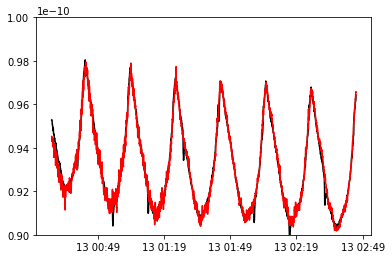

In [281]:
plt.figure()
plt.plot(ms[hdrs[0]],y,'k')
plt.ylim(9e-11,1e-10)
plt.plot(ms[hdrs[0]],yr,'r')
plt.show()

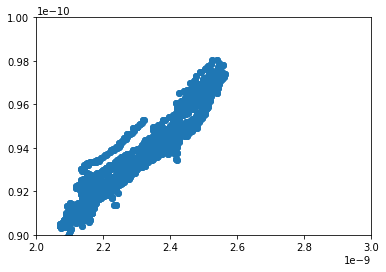

In [283]:
plt.figure()
plt.scatter(ms[hdrs[62]],ms[hdrs[64]])
plt.xlim(2e-9,3e-9)
plt.ylim(9e-11,1e-10)
plt.show()
                            

In [42]:
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
from rpy2.robjects import r, pandas2ri


In [43]:
st = importr('stats')

In [120]:
huh = ((y-XX.sum(axis=1))**2).sum()

In [303]:
out

R object with classes: ('lm',) mapped to:
<ListVector - Python:0x117b9dea8 / R:0x7fdf28d9c898>
[Float..., Float..., Float..., ..., Vector, Formula, DataF...]
  coefficients: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x117c569e0 / R:0x7fdf24a8f0e0>
[0.000000, 0.013368]
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x1192805a8 / R:0x7fdf2ae4aa00>
[0.000000, 0.000000, 0.000000, ..., 0.000000, 0.000000, 0.000000]
  effects: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x119280098 / R:0x7fdf2ae52800>
[-0.000000, -0.000000, 0.000000, ..., 0.000000, 0.000000, 0.000000]
  ...
  coefficients: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('lm',) mapped to:
<Vector - Python:0x117870290 / R:0x7fdf2462bc70>
[RNULLType, Vector]
  residuals: <class 'rpy2.robjec

In [302]:
fvap = ms[hdrs[62]]
ep = ms[hdrs[64]]
fmla = Formula('ep~fvap'); 
env = fmla.environment; 
env['ep'] = ep; env['fvap'] = vap;

out = st.lm(fmla)

yv = st.predict(out,vap)

RRuntimeError: Error in eval(predvars, data, env) : 
  numeric 'envir' arg not of length one


In [338]:
ok = True; alpha = y.mean(); f = XX*0; m = 2; rss0 = 0;  hdri = f.columns.values

fmla = Formula('ep~fvap'); env = fmla.environment; env['ep'] = ep; env['fvap'] = vap;

while ok:
    for k in range(0,len(XX.columns)):
        idk = (range(0,k,1)+range(k+1,len(XX.columns),1))
        ep = y - f[hdri[idk]].sum(axis=1) - alpha
        if hdri[k] == hdrs[62]:
            b2 = st.lm(fmla)
            newy = st.predict(b2,pd.DataFrame(XX[hdri[k]]))
            t = pandas2ri.ri2py(newy)
            f[hdri[k]] = t
        else:
            b = st.smooth_spline(XX[hdri[k]],ep,df=10)
            newy = st.predict(b,XX[hdri[k]])
            t = pandas2ri.ri2py_dataframe(newy).T
            f[hdri[k]] = t[1].values
    rss = ((y-f.sum(axis=1))**2).sum()
    if abs(rss-rss0) < 1e-6*rss:
        ok = False
    rss0 = rss

#Reconstruct is:
yr = alpha + f.sum(axis=1)

In [348]:
pandas2ri.ri2py(y2).shape

(4019,)

ValueError: x and y must be the same size

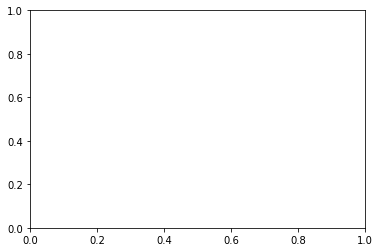

In [346]:
y2 = st.predict(b2,pd.DataFrame(np.linspace(1e-9,5e-9,50)))
plt.figure()
plt.scatter(np.linspace(1e-9,5e-9,50),pandas2ri.ri2py(y2))
plt.show()

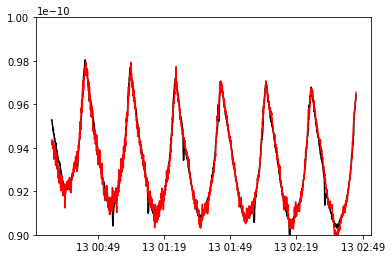

In [337]:
plt.figure()
plt.plot(ms[hdrs[0]],y,'k')
plt.ylim(9e-11,1e-10)
plt.plot(ms[hdrs[0]],yr,'r')
plt.show()

In [304]:
import array
from rpy2.robjects import IntVector, Formula
from rpy2.robjects.packages import importr
stats = importr('stats')

x = IntVector(range(1, 11))
y = x.ro + stats.rnorm(10, sd=0.2)

fmla = Formula('y ~ x')
env = fmla.environment
env['x'] = x
env['y'] = y

fit = stats.lm(fmla)

In [320]:
Y = pd.DataFrame(pandas2ri.ri2py(y))
yv = stats.predict(fit,Y)

In [372]:
XX = ms[hdrs[idx]]
y = (ms[hdrs[64]])

In [393]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import Ridge
model = Ridge()
# Generate natural cubic spline basis with df+4 knots.
# transformed_x3 = dmatrix("cr(train,df = 3)", {"train": train_x}, return_type='dataframe')
# fit3 = sm.GLM(train_y, transformed_x3).fit()
bas = dmatrix("cr(train,df=3)-1", {"train": XX[hdri[k]]})
#Bb = smf.OLS(y, bas).fit()

Bb = model.fit(bas,y)

In [395]:
# Prediction on validation set
pred3 = Bb.predict(dmatrix("cr(valid, df=3)-1", {"valid": XX[hdri[k]]}, return_type='dataframe'))
# Calculating RMSE value
rms = np.sqrt(np.sum((y-pred3)**2))
print(rms)

5.92262509555e-11


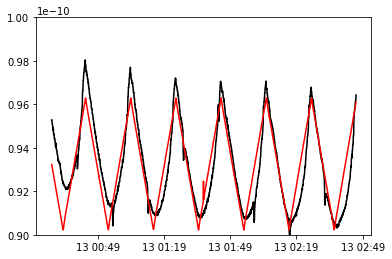

In [396]:
plt.figure()
plt.plot(ms[hdrs[0]],y,'k')
plt.ylim(9e-11,1e-10)
plt.plot(ms[hdrs[0]],pred3,'r')
plt.show()

In [397]:
XX[hdri[k]]

5858    62.3419
5859    62.5662
5860    63.0072
5861    63.6244
5862    63.9330
5863    64.2070
5864    64.6888
5865    65.0697
5866    65.5740
5867    65.4957
5868    66.1115
5869    67.1430
5870    67.2560
5871    67.6370
5872    68.3101
5873    68.2981
5874    68.7695
5875    68.9276
5877    70.0482
5878    70.3058
5879    70.7668
5880    71.0696
5881    71.8424
5882    72.1905
5883    72.7298
5884    72.8444
5885    73.2452
5886    73.5631
5887    73.8856
5888    74.6481
         ...   
9865    17.4619
9866    16.9464
9867    16.3125
9868    16.1626
9869    15.8689
9870    15.2950
9871    14.9953
9872    14.5129
9873    14.2342
9874    13.7068
9875    13.5450
9876    13.3188
9877    12.7571
9878    12.5563
9879    12.1459
9880    11.9242
9881    11.4344
9882    10.7799
9883    10.4249
9884     9.8603
9885     9.4470
9886     9.1475
9887     8.8704
9888     8.4047
9889     8.1262
9890     7.6171
9891     7.1500
9892     6.9389
9893     6.4628
9894     6.1304
Name: Pressure (db), Len